# Linear discriminant analysis
Supervised data compression

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd

#Load data
dataObj = load_wine()
X = dataObj.data
y = dataObj.target

# Create DataFrame with features
df = pd.DataFrame(X)
df.columns = dataObj.feature_names

# Add class column
df.insert(loc=0, column="Class", value=y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standize
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Method 1: Using NumPy

### Calculate the mean vectors for each class

In [2]:
mvs = []

for label in np.unique(y):
    mv = np.mean(X_train_std[y_train == label, :], axis=0)
    mvs.append(mv)
    #mv_print = ", ".join(f"{i:5.2f}" for i in mv)
    #print(f"Label={label}, MV:{mv_print}")

df = pd.DataFrame(mvs)
df.index.name = 'Label'
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
Label,,,,,,,,,,,,,
0,0.925866,-0.309124,0.259227,-0.798940,0.303854,0.960837,1.051521,-0.630583,0.535392,0.220910,0.485495,0.798046,1.201712
1,-0.872738,-0.385444,-0.443670,0.248071,-0.240909,-0.105868,0.018743,-0.016401,0.109521,-0.879623,0.439236,0.277613,-0.701560
2,0.163701,0.892906,0.324879,0.565776,-0.009990,-0.949885,-1.227979,0.743627,-0.765205,0.979004,-1.169782,-1.300711,-0.391201


### Compute the within-class scatter matrix
Not used because classes are not equally distributed:

In [3]:
d = X_train_std.shape[1]

# Within-class scatter matrix
S_W_temp = np.zeros((d, d))

for label, mv in zip(np.unique(y), mvs):
    # Individual scatter matrix for each class
    S_i = np.zeros((d, d))
    for row in X_train_std[y_train == label]:
        row = row.reshape(d,1)
        mv = mv.reshape(d,1)
        rmmv = row - mv
        # Outer product
        S_i +=  rmmv @ rmmv.T
    S_W_temp += S_i

In [4]:
df = pd.DataFrame(S_W_temp)
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,51.451013,0.670318,-2.062585,-3.472385,4.843889,9.090169,5.686871,-2.412466,1.108122,18.656704,1.624442,-1.124742,5.566597
1,0.670318,84.993055,9.474731,14.834453,-7.898675,2.513901,1.030424,13.691910,8.998687,-6.655785,-16.784608,7.356546,-11.077693
2,-2.062585,9.474731,107.972647,62.559497,14.260931,13.586075,11.007446,20.672912,2.322770,-2.342400,4.374623,10.311715,-3.648072
3,-3.472385,14.834453,62.559497,84.248790,1.851511,5.270018,6.273419,14.782903,-0.760475,-5.435407,2.205011,12.296738,-4.982059
4,4.843889,-7.898675,14.260931,1.851511,117.459590,7.051320,4.795725,-30.108559,28.009240,2.780081,6.000078,-4.914051,15.672926
5,9.090169,2.513901,13.586075,5.270018,7.051320,54.942636,27.245792,-6.965156,30.771873,10.964423,0.962913,16.348827,6.450714
6,5.686871,1.030424,11.007446,6.273419,4.795725,27.245792,26.977252,-13.247365,26.409159,9.997179,0.648127,8.928054,1.869778
7,-2.412466,13.691910,20.672912,14.782903,-30.108559,-6.965156,-13.247365,88.727075,-10.026303,-1.610215,3.952455,-6.530594,-4.912450
8,1.108122,8.998687,2.322770,-0.760475,28.009240,30.771873,26.409159,-10.026303,91.452590,17.577228,-4.376609,9.358566,11.281319
9,18.656704,-6.655785,-2.342400,-5.435407,2.780081,10.964423,9.997179,-1.610215,17.577228,50.589136,-9.721823,-6.071147,11.422201


### Compute the "scaled" within-class scatter matrix
This is essentially covariance matrix


In [5]:
d = X_train_std.shape[1]

# Scaled within-class scatter matrix
S_W = np.zeros((d, d))

for label in np.unique(y):
    S_i = np.cov(X_train_std[y_train == label], rowvar=False)
    S_W += S_i

df = pd.DataFrame(S_W)
display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.245832,0.051385,-0.032946,-0.089533,0.115463,0.245386,0.150110,-0.055687,0.099079,0.487858,0.023763,-0.006972,0.134211
1,0.051385,2.154697,0.224341,0.354339,-0.196603,0.036054,-0.005403,0.340167,0.168398,-0.167482,-0.357550,0.177277,-0.254172
2,-0.032946,0.224341,2.525035,1.458130,0.370291,0.336648,0.238744,0.471352,0.030912,-0.056416,0.128417,0.234080,-0.106648
3,-0.089533,0.354339,1.458130,1.980524,0.081397,0.117952,0.125216,0.327635,-0.037325,-0.129452,0.061622,0.255452,-0.129087
4,0.115463,-0.196603,0.370291,0.081397,2.704772,0.160415,0.149802,-0.736919,0.598469,0.076183,0.118491,-0.113417,0.317966
5,0.245386,0.036054,0.336648,0.117952,0.160415,1.297619,0.615561,-0.116308,0.721829,0.304018,0.007153,0.361148,0.159978
6,0.150110,-0.005403,0.238744,0.125216,0.149802,0.615561,0.622380,-0.345311,0.598214,0.260335,0.002007,0.167815,0.049200
7,-0.055687,0.340167,0.471352,0.327635,-0.736919,-0.116308,-0.345311,2.205761,-0.179296,-0.028542,0.119312,-0.109606,-0.082535
8,0.099079,0.168398,0.030912,-0.037325,0.598469,0.721829,0.598214,-0.179296,2.107296,0.506807,-0.124926,0.181378,0.269049
9,0.487858,-0.167482,-0.056416,-0.129452,0.076183,0.304018,0.260335,-0.028542,0.506807,1.396840,-0.285939,-0.153587,0.292842


### Compute the between-class scatter matrix

In [6]:
d = X_train_std.shape[1] # number of features

# Mean overall (actually this will give all zeros becuase data is already standardized.)
mva = np.mean(X_train_std, axis=0).reshape(d,1) # make column vector

S_B = np.zeros((d, d))
for label, mv in zip(np.unique(y), mvs):
    # Count number of obervation in each class
    n = X_train[y_train == label, :].shape[0]
    # Mean values for each class
    mv = mv.reshape(d, 1)  # make column vector
    mmm = mv - mva
    # Outer product
    S_B += n * mmm @ mmm.T

df = pd.DataFrame(S_B)
display(df)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,72.548987,10.150854,30.434936,-36.955377,21.498172,34.669248,31.105454,-18.391439,10.760239,51.406889,-7.505740,10.231038,72.265198
1,10.150854,39.006945,15.327186,22.875063,0.480648,-39.566719,-51.732454,31.346500,-32.602566,44.477269,-50.856544,-55.760443,-13.834611
2,30.434936,15.327186,16.027353,-7.243972,8.274408,1.463630,-3.467231,2.273590,-5.530406,32.545488,-17.816088,-12.550317,23.264151
3,-36.955377,22.875063,-7.243972,39.751210,-12.836639,-50.802702,-57.692909,34.677990,-30.931295,1.634430,-33.340323,-47.886016,-54.678244
4,21.498172,0.480648,8.274408,-12.836639,6.540410,13.260033,12.988480,-7.730624,5.481962,12.726210,1.124818,6.877296,23.024184
5,34.669248,-39.566719,1.463630,-50.802702,13.260033,69.057364,81.141760,-48.873033,45.448841,-19.494536,55.271214,72.474962,62.831215
6,31.105454,-51.732454,-3.467231,-57.692909,12.988480,81.141760,97.022748,-58.498476,55.507607,-33.593099,71.100072,89.725066,66.714251
7,-18.391439,31.346500,2.273590,34.677990,-7.730624,-48.873033,-58.498476,35.272925,-33.508345,20.615306,-43.044611,-54.206006,-39.929151
8,10.760239,-32.602566,-5.530406,-30.931295,5.481962,45.448841,55.507607,-33.508345,32.547410,-26.209452,44.083674,53.416399,32.447784
9,51.406889,44.477269,32.545488,1.634430,12.726210,-19.494536,-33.593099,20.615306,-26.209452,73.410864,-54.724468,-49.482727,27.452510


### Computer eigenvalues and eigenvectors
Solve the generalized eigenvalue problem for the matrix $S_W^{-1}S_B$:

In [7]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [8]:
# Print the real parts of the eigenvalues
eigen_vals.real

array([-2.84217094e-14,  1.56436361e+02,  4.52721581e+02, -2.14210848e-14,
       -2.14210848e-14,  2.94949277e-14,  2.94949277e-14,  1.47057057e-14,
        1.47057057e-14, -1.07752065e-15, -1.07752065e-15, -6.85990803e-15,
        1.20187193e-15])

### Sort eigenvectors in decreasing order of the eigenvalues

In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(eigen_vals[i].real, eigen_vecs.real[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

df = pd.DataFrame(eigen_pairs)
df.index.name = "Order"
df.columns = ["Eigenvalues","Eigenvectors"]
display(df)

,Eigenvalues,Eigenvectors
Order,,
0,4.527216e+02,"[-0.06615876883289219, 0.038620561508021525, -..."
1,1.564364e+02,"[-0.379741246436571, -0.22064303455104475, -0...."
2,2.949493e-14,"[0.11779378241369856, -0.2045244235673671, -0...."
3,2.949493e-14,"[0.11779378241369856, -0.2045244235673671, -0...."
4,1.470571e-14,"[-0.595732834467147, 0.38679067578339626, 0.15..."
5,1.470571e-14,"[-0.595732834467147, 0.38679067578339626, 0.15..."
6,1.201872e-15,"[0.7277361357334139, -0.025215076407144824, -0..."
7,-1.077521e-15,"[0.7352941707283567, -0.18631544428270808, -0...."
8,-1.077521e-15,"[0.7352941707283567, -0.18631544428270808, -0...."


### Visualizing "discriminability"

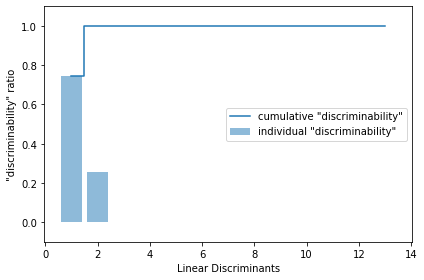

In [10]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 14), discr, alpha=0.5, align='center', label='individual "discriminability"')
plt.step(range(1, 14), cum_discr, where='mid', label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/lda1.png', dpi=300)
plt.show()

### Transformation matrix, W

In [11]:
w1 = eigen_pairs[0][1]
w2 = eigen_pairs[1][1]
w = np.stack((w1,w2),axis=1)
print('Matrix W:\n', w)

Matrix W:
 [[-0.06615877 -0.37974125]
 [ 0.03862056 -0.22064303]
 [-0.0217454  -0.3816223 ]
 [ 0.18400808  0.30175689]
 [-0.00343355  0.01414971]
 [ 0.23263171  0.02337798]
 [-0.77466862  0.18689504]
 [-0.08114771  0.06961935]
 [ 0.08750287  0.17958558]
 [ 0.18500646 -0.28397654]
 [-0.06595992  0.23490757]
 [-0.38052382  0.07295849]
 [-0.32854326 -0.59707531]]


### Projecting samples onto the new feature space

In [12]:
X_train_lda = X_train_std.dot(w)

### Visualizing training data

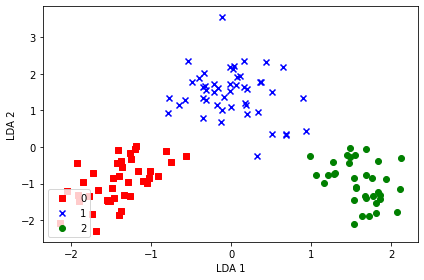

In [13]:
from PlotFunction3 import plot_reduced_dim
plot_reduced_dim(X_train_lda, y_train, "LDA")

## Method 2: SKL

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()
X_train_lda = lda.fit_transform(X_train_std, y_train)
lda.explained_variance_ratio_

array([0.73846314, 0.26153686])

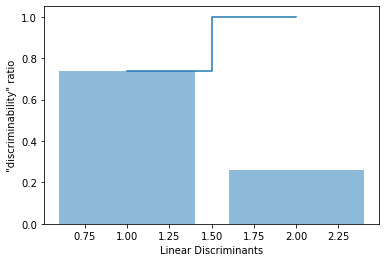

In [15]:
plt.bar(range(1, 3), lda.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 3), np.cumsum(lda.explained_variance_ratio_), where='mid')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.show()

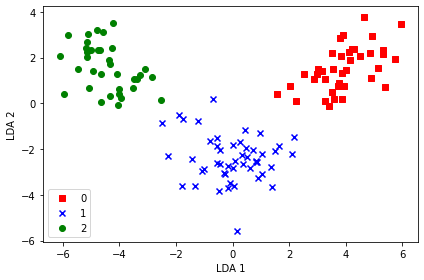

In [16]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)

plot_reduced_dim(X_train_lda, y_train, "LDA")

## Training with logistic regression

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)

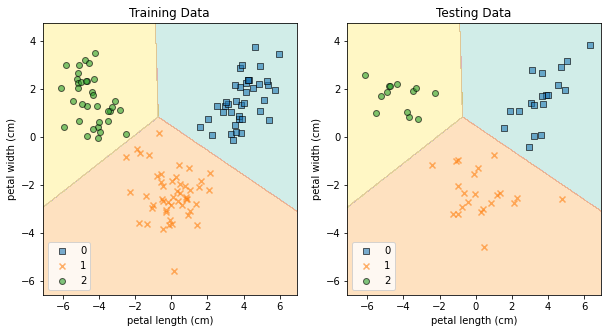

In [18]:
from PlotFunction2 import plot_decision_surface2

plot_decision_surface2(X_train_lda, X_test_lda, y_train, y_test, lr)